In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# install finrl library
!sudo apt install -y swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git




The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1116 kB of archives.
After this operation, 5542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5632 B]
Fetched 1116 kB in 1s (816 kB/s)

78Selecting previously unselected package swig4.0.
(Reading database ... 123110 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 11%] [######....................................................] 8Unpacking swig4.0 (4.0.2-1ubuntu1) ...
7Progress: [ 22%

In [3]:
# We also need to install quantstats, because the environment uses it to plot graphs
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.4 MB/s eta 0:00:00


In [4]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=3666177 sha256=d97f1813fc098ccaa0be821d9d16f13f87d6cb6f80edaf621c54701b0ebafb85
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=2832915 sha256=eac91179f05863071ea22cff

In [5]:
# Hide matplotlib warnings
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [6]:
import torch

import numpy as np
import pandas as pd

from torch_geometric.utils import k_hop_subgraph

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
from finrl.agents.portfolio_optimization.models import DRLAgent
from finrl.agents.portfolio_optimization.architectures import GPM

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [7]:
# download repository with data and extract tar.gz file with processed temporal data
!curl -L -O https://github.com/C4i0kun/Temporal_Relational_Stock_Ranking_FinRL/archive/refs/heads/main.zip
# !unzip Temporal_Relational_Stock_Ranking_FinRL-main.zip
# !mv Temporal_Relational_Stock_Ranking_FinRL-main Temporal_Relational_Stock_Ranking_FinRL
# !tar -xzvf Temporal_Relational_Stock_Ranking_FinRL/temporal_data/temporal_data_processed.tar.gz -C Temporal_Relational_Stock_Ranking_FinRL/temporal_data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  146M    0  146M    0     0  18.6M      0 --:--:--  0:00:07 --:--:-- 33.0M


In [8]:
ls -lh

total 147M
---------- 1 root root 143K Sep 22 21:31 __notebook__.ipynb
-rw-r--r-- 1 root root 147M Sep 22 21:31 main.zip


In [9]:
#!unzip Temporal_Relational_Stock_Ranking_FinRL-main.zip
!unzip main.zip

Archive:  main.zip
b0a94b8166432fd6440899e8111aaef24f5cff62
   creating: Temporal_Relational_Stock_Ranking_FinRL-main/
 extracting: Temporal_Relational_Stock_Ranking_FinRL-main/.gitignore  
  inflating: Temporal_Relational_Stock_Ranking_FinRL-main/LICENSE  
  inflating: Temporal_Relational_Stock_Ranking_FinRL-main/README.md  
   creating: Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/
   creating: Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_indexes/
  inflating: Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_indexes/NASDAQ_sector_industry_edge_index.npy  
  inflating: Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_indexes/NASDAQ_wikidata_edge_index.npy  
  inflating: Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_indexes/NYSE_sector_industry_edge_index.npy  
  inflating: Temporal_Relational_Stock_Ranking_FinRL-main/relational_data/edge_indexes/NYSE_wikidata_edge_index.npy  
   creating: Tempor

In [10]:
!mv Temporal_Relational_Stock_Ranking_FinRL-main Temporal_Relational_Stock_Ranking_FinRL
!tar -xzvf Temporal_Relational_Stock_Ranking_FinRL/temporal_data/temporal_data_processed.tar.gz -C Temporal_Relational_Stock_Ranking_FinRL/temporal_data

NASDAQ_temporal_data.csv
NYSE_temporal_data.csv


In [11]:
nasdaq_temporal = pd.read_csv("/kaggle/working/Temporal_Relational_Stock_Ranking_FinRL/temporal_data/NASDAQ_temporal_data.csv")
nasdaq_temporal

,day,open,high,low,close,volume,tic
0,0,0.270533,0.269522,0.267237,0.263333,0.275333,AABA
1,0,0.238730,0.237522,0.239888,0.240502,0.248031,AAON
2,0,0.424556,0.424768,0.429769,0.442628,0.445018,AAPL
3,0,0.650667,0.648412,0.634492,0.631473,0.667839,AAWW
4,0,0.766565,0.761693,0.759330,0.750061,0.788157,AAXJ
...,...,...,...,...,...,...,...
1277365,1244,0.909992,0.918809,0.912345,0.922698,0.913021,ZBRA
1277366,1244,0.660990,0.648907,0.636086,0.630816,0.665167,ZEUS
1277367,1244,0.981600,0.961674,0.926768,0.914257,0.984345,ZION
1277368,1244,0.980227,0.974903,0.960225,0.964956,0.997580,ZIV


In [12]:
nasdaq_edge_index = np.load("/kaggle/working/Temporal_Relational_Stock_Ranking_FinRL/relational_data/edge_indexes/NASDAQ_sector_industry_edge_index.npy")
nasdaq_edge_index

array([[   0,   15,    0, ..., 1021, 1014, 1024],
       [  15,    0,   18, ..., 1011, 1024, 1014]])

In [13]:
nasdaq_edge_type = np.load("/kaggle/working/Temporal_Relational_Stock_Ranking_FinRL/relational_data/edge_types/NASDAQ_sector_industry_edge_type.npy")
nasdaq_edge_type

array([ 0,  0,  0, ...,  1, 26, 26])

In [14]:
list_of_stocks = nasdaq_temporal["tic"].unique().tolist()
tics_in_portfolio = ["AAPL", "CMCSA", "CSCO", "FB", "HBAN", "INTC", "MSFT", "MU", "NVDA", "QQQ", "XIV"]

portfolio_nodes = []
for tic in tics_in_portfolio:
    portfolio_nodes.append(list_of_stocks.index(tic))
portfolio_nodes

[2, 185, 215, 310, 395, 464, 596, 603, 637, 768, 1014]

In [15]:
nodes_kept, new_edge_index, nodes_to_select, edge_mask = k_hop_subgraph(
    torch.LongTensor(portfolio_nodes),
    2,
    torch.from_numpy(nasdaq_edge_index),
    relabel_nodes=True,
)

In [16]:
# reduce temporal data
nodes_kept = nodes_kept.tolist()
nasdaq_temporal["tic_id"], _ = pd.factorize(nasdaq_temporal["tic"], sort=True)
nasdaq_temporal = nasdaq_temporal[nasdaq_temporal["tic_id"].isin(nodes_kept)]
nasdaq_temporal = nasdaq_temporal.drop(columns="tic_id")
nasdaq_temporal

,day,open,high,low,close,volume,tic
2,0,0.424556,0.424768,0.429769,0.442628,0.445018,AAPL
4,0,0.766565,0.761693,0.759330,0.750061,0.788157,AAXJ
7,0,0.244700,0.244212,0.238217,0.231041,0.251322,ABCB
8,0,0.689403,0.698864,0.695715,0.675068,0.708124,ABCO
13,0,0.566419,0.564621,0.563147,0.560503,0.579132,ACIW
...,...,...,...,...,...,...,...
1277358,1244,0.923544,0.922537,0.896003,0.888519,0.966042,XIV
1277359,1244,0.919490,0.931946,0.950966,0.960872,0.920000,XLNX
1277361,1244,0.736906,0.747264,0.744030,0.745198,0.743781,YNDX
1277367,1244,0.981600,0.961674,0.926768,0.914257,0.984345,ZION


In [17]:
# reduce edge type
new_edge_type = torch.from_numpy(nasdaq_edge_type)[edge_mask]
_, new_edge_type = torch.unique(new_edge_type, return_inverse=True)
new_edge_type

tensor([0, 0, 0,  ..., 2, 6, 6])

In [18]:
df_portfolio = nasdaq_temporal[["day", "tic", "close", "high", "low"]]

df_portfolio_train = df_portfolio[df_portfolio["day"] < 979]
df_portfolio_test = df_portfolio[df_portfolio["day"] >= 979]

environment_train = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=50,
        features=["close", "high", "low"],
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tics_in_portfolio
    )

environment_test = PortfolioOptimizationEnv(
        df_portfolio_test,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=50,
        features=["close", "high", "low"],
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tics_in_portfolio
    )

In [19]:
# set PolicyGradient parameters
model_kwargs = {
    "lr": 0.01,
    "policy": GPM,
}

# here, we can set GPM's parameters
policy_kwargs = {
    "edge_index": new_edge_index,
    "edge_type": new_edge_type,
    "nodes_to_select": nodes_to_select
}

model = DRLAgent(environment_train).get_model("pg", device, model_kwargs, policy_kwargs)

In [20]:
DRLAgent.train_model(model, episodes=2)

  0%|          | 0/2 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 206913.9375
Final accumulative portfolio value: 2.069139375
Maximum DrawDown: -0.16188132039571357
Sharpe ratio: 6.269666835170539


 50%|█████     | 1/2 [29:22<29:22, 1762.93s/it]

Initial portfolio value:100000
Final portfolio value: 349780.25
Final accumulative portfolio value: 3.4978025
Maximum DrawDown: -0.05764460412673944
Sharpe ratio: 10.233600296025056


100%|██████████| 2/2 [58:45<00:00, 1762.83s/it]


In [21]:
torch.save(model.train_policy.state_dict(), "policy_GPM.pt")

In [22]:
GPM_results = {
    "train": environment_train._asset_memory["final"],
    "test": {},
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = GPM(new_edge_index, new_edge_type, nodes_to_select, device=device)
policy.load_state_dict(torch.load("policy_GPM.pt"))

# testing
DRLAgent.DRL_validation(model, environment_test, policy=policy)
GPM_results["test"] = environment_test._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 143940.9375
Final accumulative portfolio value: 1.439409375
Maximum DrawDown: -0.0031985304135730974
Sharpe ratio: 21.15628963621472


In [23]:
UBAH_results = {
    "train": {},
    "test": {},
}

PORTFOLIO_SIZE = len(tics_in_portfolio)

# train period
terminated = False
environment_train.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_train.step(action)
UBAH_results["train"] = environment_train._asset_memory["final"]

# test period
terminated = False
environment_test.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_test.step(action)
UBAH_results["test"] = environment_test._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 210066.515625
Final accumulative portfolio value: 2.10066515625
Maximum DrawDown: -0.1770357694310173
Sharpe ratio: 6.126976338415281
Initial portfolio value:100000
Final portfolio value: 140385.78125
Final accumulative portfolio value: 1.4038578125
Maximum DrawDown: -0.001439125798492591
Sharpe ratio: 23.930156872458472


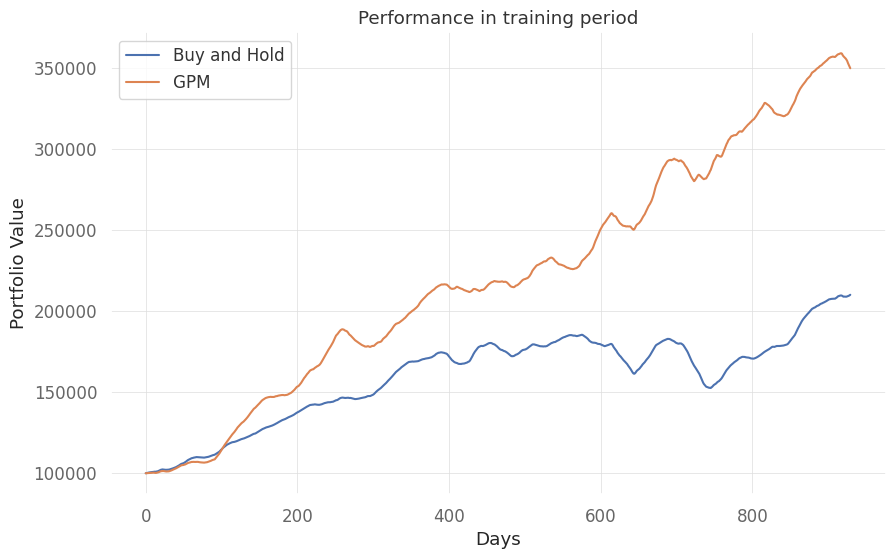

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(UBAH_results["train"], label="Buy and Hold")
plt.plot(GPM_results["train"], label="GPM")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in training period")
plt.legend()

plt.show()

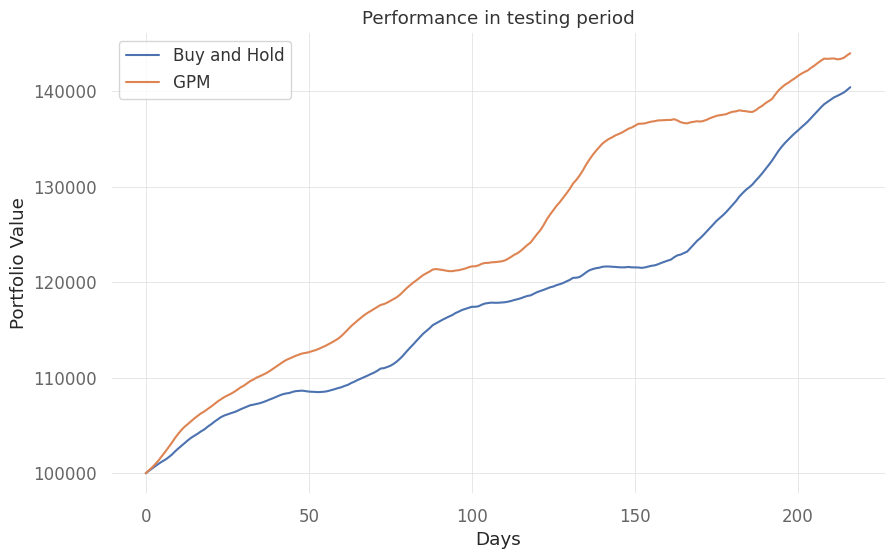

In [25]:
plt.plot(UBAH_results["test"], label="Buy and Hold")
plt.plot(GPM_results["test"], label="GPM")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in testing period")
plt.legend()

plt.show()